In [1]:
__author__ = "Ankur Dhoot"

## Binary Search Notebook

### Purpose

This notebook will demonstrate the binary search algorithm.

### Set-Up

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time


### Data Generation

In [11]:
def generate_random_sample(n):
    # Generate a random list of n numbers
    return random.sample(range(n), n)

In [12]:
generate_random_sample(10)

[8, 4, 3, 7, 0, 6, 2, 1, 9, 5]

In [13]:
generate_random_sample(20)

[14, 15, 9, 12, 2, 13, 17, 11, 16, 7, 3, 1, 4, 6, 5, 8, 10, 0, 18, 19]

### Linear Scan Algorithm

The linear scan algorithm just loops over the entire list until it find the target element. The nice thing about this algorithm is that it works for unsorted (and sorted!) lists.

In [40]:
def linear_scan(search_list, target_value):
    # Returns the index of target_value in search_list if it exists. Else, returns -1.
    for index, value in enumerate(search_list):
        if value == target_value:
            return index
    # The target_value was not found
    return -1

In [41]:
assert linear_scan([1,3,5,8], 5) == 2
assert linear_scan([1,3,5,8], 10) == -1

### Binary Search Algorithm

See https://en.wikipedia.org/wiki/Binary_search_algorithm.

In [42]:
def binary_search(search_list, target_value):
    lo = 0
    hi = len(search_list) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        value = search_list[mid]
        if value == target_value:
            # We found it!
            return mid
        elif value < target_value:
            # We no longer need to search the left half since the target is in the right half if it exists.
            lo = mid + 1
        else:
            # The target is in the left half if it exists
            hi = mid - 1
    return -1

In [43]:
assert binary_search([1,3,5,8], 5) == 2
assert binary_search([1,3,5,8], 10) == -1

### Runtime Comparison

Let's generate some test data and see how these algorithms compare.

In [37]:
# Average over num_runs.
num_runs = 10000
# Using a list of size search_list_size
search_list_size = 10000
# Generate the list of random numbers
search_list = generate_random_sample(search_list_size)

#### Linear Scan

In [50]:
linear_scan_start_time = time.time()
for run in range(num_runs):
    # Choose a random target value.
    target = random.randint(0, search_list_size - 1)
    target_index = linear_scan(search_list, target)
    # Sanity check that the target was found.
    assert target_index != -1, target
    
linear_scan_end_time = time.time()

avg_linear_scan_time = (linear_scan_end_time - linear_scan_start_time) / num_runs
print('Linear Scan Average Time %fs' % avg_time)

Linear Scan Average Time 0.000210s


#### Binary Search

In [51]:
# Binary search only works on sorted lists!
search_list.sort()

binary_search_start_time = time.time()
for run in range(num_runs):
    # Choose a random target value.
    target = random.randint(0, search_list_size - 1)
    target_index = binary_search(search_list, target)
    # Sanity check that the target was found
    assert target_index != -1
    
binary_search_end_time = time.time()

avg_binary_search_time = (binary_search_end_time - binary_search_start_time) / num_runs
print('Binary Search Average Time %fs' % avg_binary_search_time)

Binary Search Average Time 0.000003s


#### Linear Scan Runtime Plot

Let's look at how the linear scan algorithm runtime scales with the size of the list to be searched.

Text(0.5, 0, 'Search List Size')

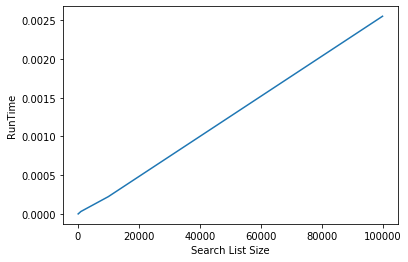

In [57]:
num_runs = 1000
search_list_sizes = [100, 1000, 10000, 100000]

linear_scan_search_times = []

for search_size in search_list_sizes:
    # Create a random list of size search_size
    search_list = generate_random_sample(search_size)
    linear_scan_start_time = time.time()
    for run in range(num_runs):
        # Choose a random target value.
        target = random.randint(0, search_size - 1)
        target_index = binary_search(search_list, target)
        # Sanity check that the target was found.
        assert target_index != -1, target

    linear_scan_end_time = time.time()
    
    # Record how long searches took on average on search_size lists.
    linear_scan_search_times.append((linear_scan_end_time - linear_scan_start_time) / num_runs)
    
plt.plot(search_list_sizes, linear_scan_search_times)
plt.ylabel('RunTime')
plt.xlabel('Search List Size')


#### Binary Search Runtime Plot

Text(0.5, 0, 'Search List Size')

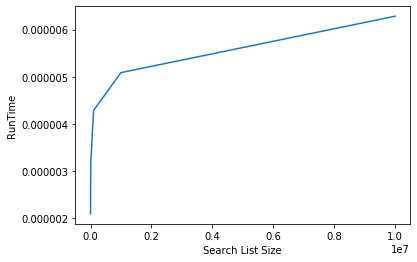

In [64]:
num_runs = 10000
search_list_sizes = [100, 1000, 10000, 100000, 1000000, 10000000]

binary_search_search_times = []

for search_size in search_list_sizes:
    # Create a random list of size search_size
    search_list = generate_random_sample(search_size)
    # Binary Search requires a sorted list!
    search_list.sort()
    binary_search_start_time = time.time()
    for run in range(num_runs):
        # Choose a random target value.
        target = random.randint(0, search_size - 1)
        target_index = binary_search(search_list, target)
        # Sanity check that the target was found.
        assert target_index != -1, target

    binary_search_end_time = time.time()
    
    # Record how long searches took on average on search_size lists.
    binary_search_search_times.append((binary_search_end_time - binary_search_start_time) / num_runs)
    
plt.plot(search_list_sizes, binary_search_search_times)
plt.ylabel('RunTime')
plt.xlabel('Search List Size')

#### Conclusion

Looking at the runtime plots, we can see that the runtime of binary search grows *very* slowly as the size of the search list increases.